# Initializing setup

In [1]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt

import cv2
import tensorflow as tf

In [2]:
def load_image(x):
    byte_image = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_image)
    return img

def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding='utf-8') as f:
        label = json.load(f)
    return [label['coords']]

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Loading data

In [4]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (250,250)))
train_images = train_images.map(lambda x: x/255)

val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (250, 250)))
val_images = val_images.map(lambda x: x/255)

test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (250, 250)))
test_images = test_images.map(lambda x: x/255)

In [15]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

In [16]:
len(train_images), len(test_images), len(val_images), len(train_labels), len(test_labels), len(val_labels)

(7200, 2400, 6000, 7200, 2400, 6000)

In [26]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(7500)
train = train.batch(8)
train = train.prefetch(4)

test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(2500)
test = test.batch(8)
test = test.prefetch(4)

val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(6500)
val = val.batch(8)
val = val.prefetch(4)

# Visualizing data

In [83]:
data = train.as_numpy_iterator()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB dat

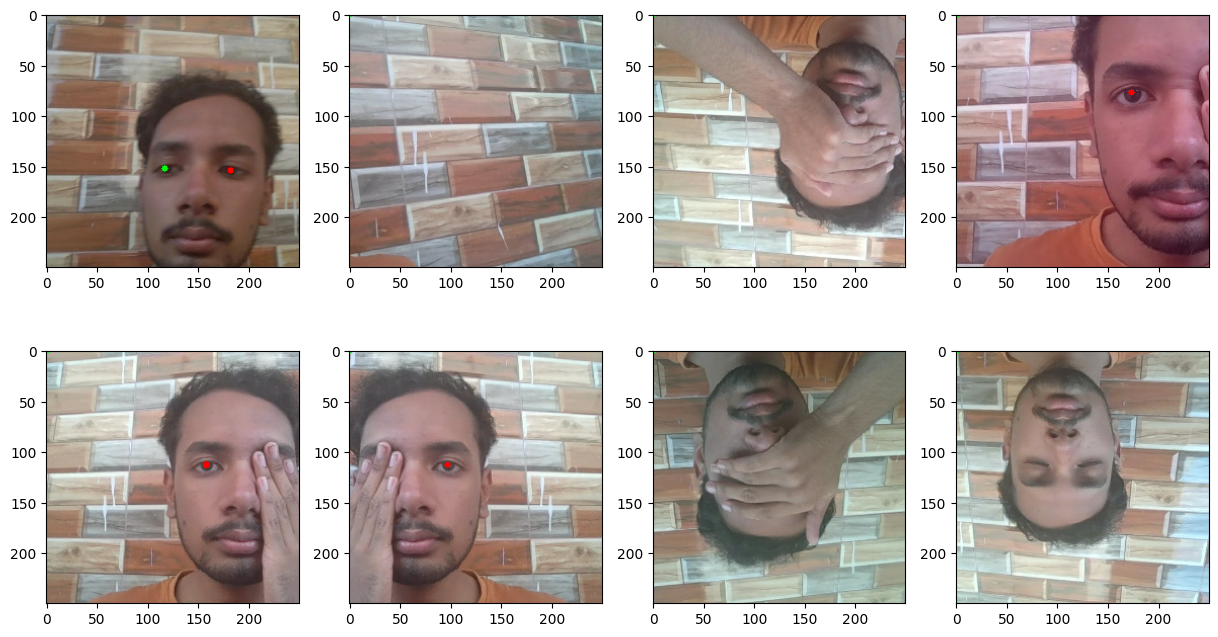

In [85]:
batch = data.next()

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,8))
for idx in range(8):
    image = batch[0][idx].copy()
    coords = batch[1][0][idx]
    
    cv2.circle(image, tuple(np.multiply(coords[:2], [250,250]).astype(int)), 3, (255,0,0), -1)
    cv2.circle(image, tuple(np.multiply(coords[2:], [250,250]).astype(int)), 3, (0,255,0), -1)

    ax[int(idx/4)][idx%4].imshow(image)
    #ax[int(idx/4)][idx%4].plot(np.multiply(coords[0], [250]), np.multiply(coords[1], [250]), 'rx')
    #ax[int(idx/4)][idx%4].plot(np.multiply(coords[2], [250]), np.multiply(coords[3], [250]), 'gX')
    